## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("szkielet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morfologia/szkielet.bmp --no-check-certificate

szkielet = cv2.imread('szkielet.bmp', cv2.IMREAD_GRAYSCALE)

# Pierwsza część zadania

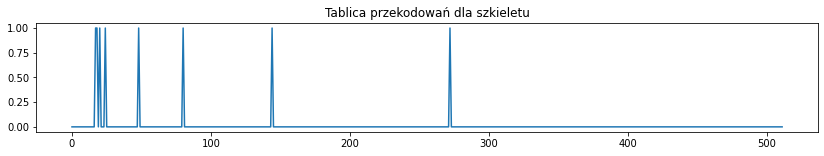

In [2]:
lut = np.zeros((512, 1))

identification_matrix = np.array([[1, 8,  64],
                                  [2, 16, 128],
                                  [4, 32, 256]])

for i in [1, 2, 4, 8, 32, 64, 128, 256]:   # elements of identification matrix without 16
    lut[16+i] = 1
    
plt.figure(figsize=(14, 2))    
plt.plot(lut)
plt.title('Tablica przekodowań dla szkieletu')
plt.show()

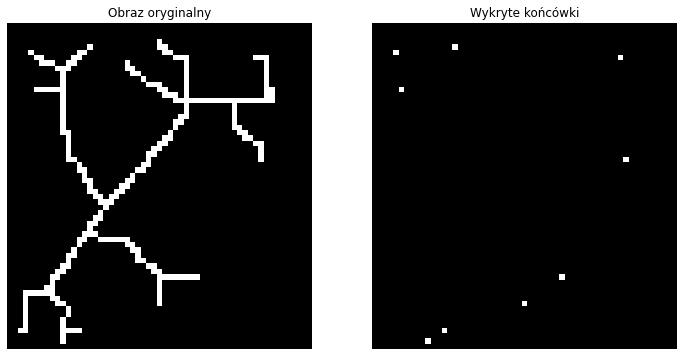

In [3]:
szkielet_bool = szkielet // 255

size = szkielet.shape

end_pixels = np.zeros(size, dtype='uint16')

for i in range(1, size[0] - 1):
    for j in range(1, size[1] - 1):
        sum_window = np.sum(szkielet_bool[i-1: i+2,j-1: j+2] * identification_matrix)
        end_pixels[i][j] = lut[sum_window]            

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 10))
ax[0].imshow(szkielet, 'gray')
ax[0].set_title('Obraz oryginalny')
ax[0].axis('off')
ax[1].imshow(end_pixels, 'gray')
ax[1].set_title('Wykryte końcówki')
ax[1].axis('off')
plt.show()

# Druga część zadania

In [4]:
import itertools
from time import sleep
import matplotlib.animation as animation
from IPython.core.display import Image

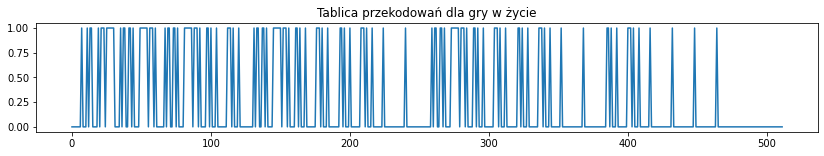

In [5]:
lut = np.zeros((512, 1), dtype=np.bool_)

identification_matrix = np.array([[1, 8,  64],
                                  [2, 16, 128],
                                  [4, 32, 256]])

elems = [1, 2, 4, 8, 32, 64, 128, 256]   # elements of identification matrix without 16

combinations = []

# case when pixel is white and have 2 white neighbors
for subset in itertools.combinations(elems, 2):  
    combinations.append(sum(subset) + 16)
    
# case when pixel is white and have 3 white neighbors
for subset in itertools.combinations(elems, 3):
    combinations.append(sum(subset) + 16)
    
# case when pixel is black and have 3 white neighbors
for subset in itertools.combinations(elems, 3):
    combinations.append(sum(subset))

    
for i in combinations:   # elements of identification matrix for game of life
    lut[i] = True
    
plt.figure(figsize=(14, 2))    
plt.plot(lut)
plt.title('Tablica przekodowań dla gry w życie')
plt.show()

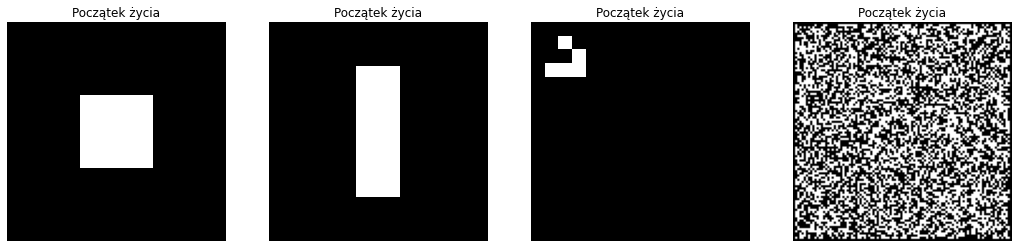

In [6]:
# ==== DATA ====

block = np.array([[0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,1,1,0,0],
                  [0,0,1,1,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0]], dtype=np.bool_)

blinker = np.array([[0,0,0,0,0],
                    [0,0,1,0,0],
                    [0,0,1,0,0],
                    [0,0,1,0,0],
                    [0,0,0,0,0]], dtype=np.bool_)

glider = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], dtype=np.bool_)

my_game = np.random.randint(2, size=(100,100), dtype=np.bool_)
my_game_with_frames = np.zeros((102,102), dtype=np.bool_)
my_game_with_frames[1:101,1:101] = my_game

fig, ax = plt.subplots(1, 4)
fig.set_size_inches((18, 10))
ax[0].imshow(block, 'gray')
ax[0].set_title('Początek życia')
ax[0].axis('off')
ax[1].imshow(blinker, 'gray')
ax[1].set_title('Początek życia')
ax[1].axis('off')
ax[2].imshow(glider, 'gray')
ax[2].set_title('Początek życia')
ax[2].axis('off')
ax[3].imshow(my_game_with_frames, 'gray')
ax[3].set_title('Początek życia')
ax[3].axis('off')
plt.show()

In [7]:
def next_stage(img, size):
    new_img = np.zeros(size, dtype=np.bool_)
    
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            sum_window = np.sum(img[i-1: i+2, j-1: j+2] * identification_matrix)
            new_img[i][j] = lut[sum_window]   
            
    return new_img

MovieWriter ffmpeg unavailable; using Pillow instead.


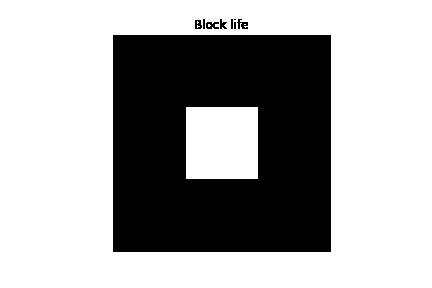

In [8]:
fig = plt.figure()
ax = plt.axes(title='Block life', axisbelow=False)
ax.set_axis_off()

size = block.shape
img = block

ims = []
for i in range(10):
    new_img = next_stage(img, size)
    img = new_img
    im = ax.imshow(new_img, 'gray', animated=True)
    
    if i == 0:
        im = ax.imshow(block, 'gray', animated=True)  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

plt.close(fig)

ani.save("block.gif")
Image(filename="block.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


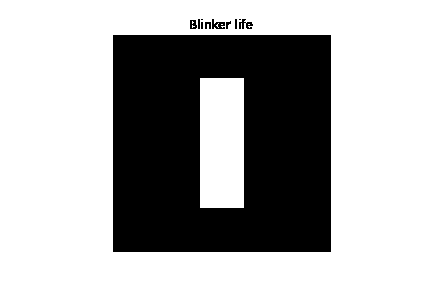

In [9]:
fig = plt.figure()
ax = plt.axes(title='Blinker life', axisbelow=False)
ax.set_axis_off()

size = blinker.shape
img = blinker

ims = []
for i in range(9):
    new_img = next_stage(img, size)
    img = new_img
    im = ax.imshow(new_img, 'gray', animated=True)
    
    if i == 0:
        im = ax.imshow(blinker, 'gray', animated=True)  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=1000)

plt.close(fig)

ani.save("blinker.gif")
Image(filename="blinker.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


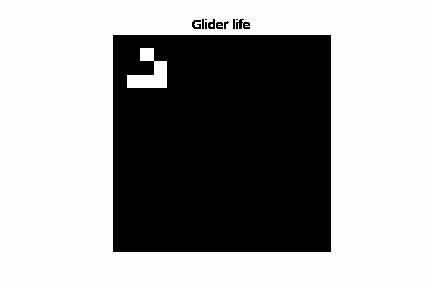

In [10]:
fig = plt.figure()
ax = plt.axes(title='Glider life', axisbelow=False)
ax.set_axis_off()

size = glider.shape
img = glider

ims = []
for i in range(40):
    new_img = next_stage(img, size)
    img = new_img
    im = ax.imshow(new_img, 'gray', animated=True)
    
    if i == 0:
        im = ax.imshow(glider, 'gray', animated=True)  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

plt.close(fig)

ani.save("glider.gif")
Image(filename="glider.gif")

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(title='My game life')
ax.set_axis_off()

size = my_game_with_frames.shape
img = my_game_with_frames

ims = []
for i in range(200):
    new_img = next_stage(img, size)
    img = new_img
    im = ax.imshow(new_img, 'gray', animated=True)
    
    if i == 0:
        im = ax.imshow(my_game_with_frames, 'gray', animated=True)  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)

plt.close(fig)

ani.save("my game.gif")
Image(filename="my game.gif")